In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import glob

In [20]:
ls -hrtl /UserData/maddalena/sacla2022/05-processed_I/

total 3.5M
-rwxrwxrwx 1 girelli   girelli   5.5K Oct 29 20:56 water_1192421.npz*
-rwxrwxrwx 1 girelli   girelli   5.5K Oct 29 20:56 water_1192422.npz*
-rwxrwxrwx 1 girelli   girelli   5.5K Oct 29 20:56 water_1192423.npz*
-rwxrwxrwx 1 girelli   girelli   5.5K Oct 29 20:56 water_1192424.npz*
-rwxrwxrwx 1 girelli   girelli   5.5K Oct 29 20:56 water_1192425.npz*
-rwxrwxrwx 1 girelli   girelli   5.5K Oct 29 20:56 water_1192426.npz*
-rw-rw-r-- 1 maddalena maddalena 5.5K Oct 30 00:03 water_1192440.npz
-rw-rw-r-- 1 maddalena maddalena 5.5K Oct 30 00:06 water_1192442.npz
-rw-rw-r-- 1 maddalena maddalena 5.5K Oct 30 00:21 water_1192444.npz
-rw-rw-r-- 1 maddalena maddalena 5.5K Oct 30 00:22 water_1192443.npz
-rw-rw-r-- 1 maddalena maddalena 5.5K Oct 30 00:22 water_1192446.npz
-rw-rw-r-- 1 maddalena maddalena 5.5K Oct 30 00:32 water_1192447.npz
-rw-rw-r-- 1 maddalena maddalena 5.5K Oct 30 01:09 water_1192450.npz
-rw-rw-r-- 1 maddalena maddalena 5.5K Oct 30 01:11 water_1192431_norm.npz


In [ ]:
path='/UserData/maddalena/sacla2022/05-processed_I/'

Text(0.5, 0, '$q$ $\\rm (\\AA^{-1})$')

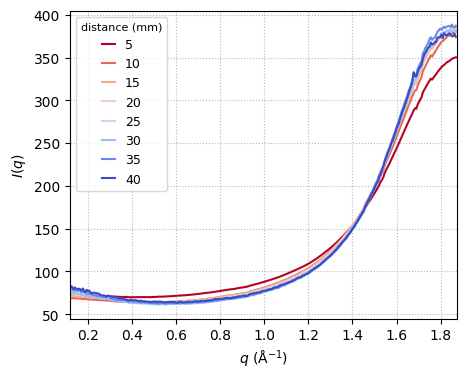

In [116]:
runs = [1192430, 1192434, 1192437, 1192442, 1192446, 1192451, 1192463, 1192473]
posz = [5,10,15,20,25,30,35,40]

col = plt.cm.coolwarm_r(np.linspace(0,1,len(runs)))
plt.figure(figsize=(5,4))

for i,run in enumerate(runs):
    file=np.load(f'{path}water_{run}.npz')
    plt.plot(file['q'][3:-3], file['I'][3:-3], c=col[i], label=str(np.round(posz[i],1)))
    # print(file['I'][3:-3])
plt.xlim(file['q'][3], file['q'][-3])
plt.grid(ls=':',alpha=.9)
legend=plt.legend(title='distance (mm)', handlelength=1, fontsize=9)
plt.setp(legend.get_title(),fontsize=8)
plt.ylabel(r'$I(q)$')
plt.xlabel(r'$q$ $\rm (\AA^{-1})$') 
# plt.xlim(0.1,0.25)
# plt.ylim(50,100)

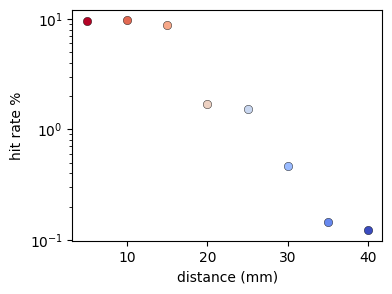

In [103]:
plt.figure(figsize=(4,3))
col = plt.cm.coolwarm_r(np.linspace(0,1,len(runs)))

for i,run in enumerate(runs):
    file=np.load(f'{path}water_{run}.npz')
    plt.plot(posz[i], file['hit_rate']*100,'o',c=col[i], markeredgecolor='k', markeredgewidth=.3)
plt.xlabel('distance (mm)')
plt.ylabel('hit rate %')
plt.yscale('log')

# Fit the shit

In [104]:
from scipy.optimize import curve_fit

def fit(function,x,y,p0=None,sigma=None,bounds=[None,None]):
    '''
    fits a function and return the fit resulting parameters and curve
    '''
    popt,pcov = curve_fit(function,x,y,p0=p0,sigma=sigma,bounds=bounds)
    xc = np.linspace(min(x),max(x),len(x))
    curve = function(xc,*popt)
    perr = np.sqrt(np.diag(pcov))
    return popt,xc,curve,perr

def gaussian(x, a, x0, sigma, d):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + d

Text(0.5, 0, 'distance (mm)')

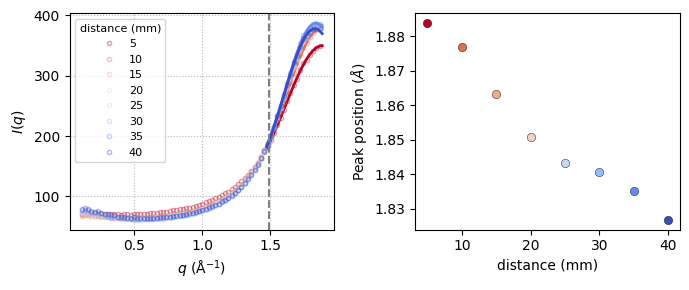

In [105]:
# runs = [1192428, 1192430, 1192433, 1192437, 1192442, 1192446, 1192450]
# posz = [0.7,5,10,15,20,25,30]

col = plt.cm.coolwarm_r(np.linspace(0,1,len(runs)))
fig, (a1,a2) = plt.subplots(1,2,figsize=(7,3), tight_layout=True)
xmin, xmax = 230, -1

for i,run in enumerate(runs):
    file=np.load(f'{path}water_{run}.npz')
    a1.plot(file['q'][3:-3:4], file['I'][3:-3:4], c=col[i], ls='',marker='o', ms=3, alpha=.4, fillstyle='none',
             label=f'{posz[i]:d}')
    popt,xc,curve,perr = fit(gaussian, file['q'][xmin:xmax], file['I'][xmin:xmax], p0=[350,1.8,.3, 50])
    a1.plot(xc, curve, c=col[i], lw=2)
    a2.plot(posz[i], popt[1], c=col[i], marker='o', markeredgecolor='k', markeredgewidth=.3, ls='')
    # a3.plot(posz[i], popt[2], c=col[i], marker='o', markeredgecolor='k', markeredgewidth=.3, ls='')
    # print(file['I'][3:-3])
a1.axvline(x=file['q'][3:-3][xmin], ls='--', c='gray')

a1.grid(ls=':',alpha=.9)
legend=a1.legend(title='distance (mm)', fontsize=8)
plt.setp(legend.get_title(),fontsize=8)
# plt.xlim(file['q'][3], file['q'][-3])
a1.set_ylabel(r'$I(q)$')
a1.set_xlabel(r'$q$ $\rm (\AA^{-1})$')
a2.set_ylabel(r'Peak position ($\AA$)')
a2.set_xlabel('distance (mm)')
# a3.set_ylabel('sigma')
# a3.set_xlabel('distance (mm)')

# Testing shit

### Only posz=40mm

Text(0.5, 1.0, 'z=40mm')

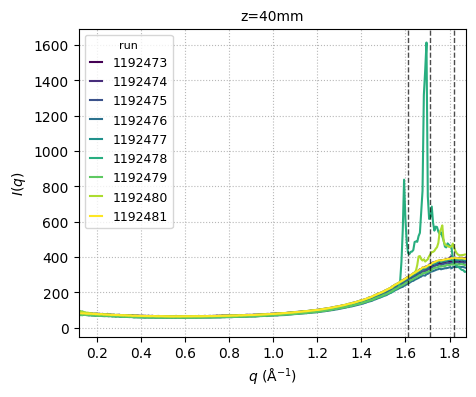

In [187]:
runs = [1192473,1192474,1192475,1192476,1192477,1192478,1192479,1192480,1192481] # 40

plt.figure(figsize=(5,4))
col = plt.cm.viridis(np.linspace(0,1,len(runs)))

for i in range(len(runs)):
    file = np.load(f'{path}water_{runs[i]}.npz')
    plt.plot(file['q'], file['I'], c=col[i], label=runs[i])
    
for ref in [1.6129, 1.71, 1.82]:
    plt.axvline(x=ref, ls='--', c='k', alpha=0.7, lw=1)

plt.xlim(file['q'][3], file['q'][-3])
plt.grid(ls=':',alpha=.9)
legend=plt.legend(title='run', handlelength=1, fontsize=9)
plt.setp(legend.get_title(),fontsize=8)
plt.ylabel(r'$I(q)$')
plt.xlabel(r'$q$ $\rm (\AA^{-1})$') 
plt.title('z=40mm', fontsize=10)

# All temps

In [198]:
runs = [[1192430,1192431], # 5
        [1192433,1192434,1192435], # 10
        [1192437,1192438,1192439,1192440], # 15 
        [1192442,1192443,1192444], #20
        [1192446,1192447,1192448], # 25
        [1192450,1192451,1192452,1192453,1192454], # 30
        [1192492],
        # [1192460,1192463,1192466,1192470], #35
        [1192473,1192475,1192476,1192477,1192481], # 40
       ] 


posz = [5,10,15,20,25,30,35,40]
print(len(runs), len(posz))

8 8


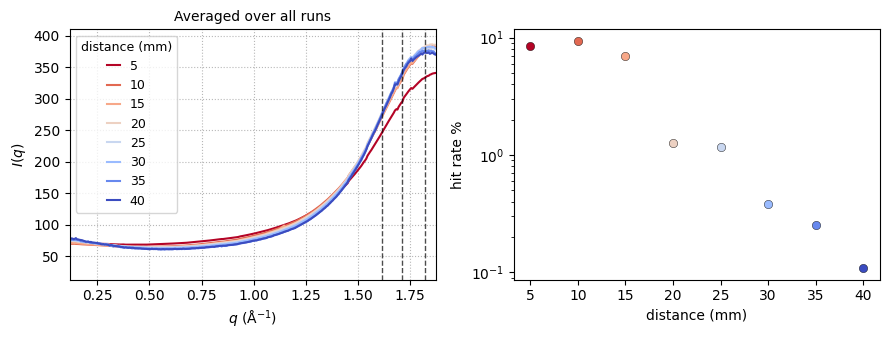

In [204]:
fig, (a1,a2) = plt.subplots(1,2,figsize=(9,3.5), tight_layout=True)
col = plt.cm.coolwarm_r(np.linspace(0,1,len(runs)))

Iqs = []
qs = []

for i in range(len(runs)):
    Iq_tmp = []
    tmp = []
    for j in range(len(runs[i])):
        file = np.load(f'{path}water_{runs[i][j]}.npz')
        Iq_tmp.append(file['I'])
        tmp.append(file['hit_rate']*100)
    qs.append(file['q'])
    Iqs.append(np.average(Iq_tmp, axis=0))
    a1.plot(qs[i], Iqs[i], c=col[i], label=posz[i])
    a2.plot(posz[i], np.average(tmp, axis=0),marker='o',c=col[i], markeredgecolor='k', markeredgewidth=.3)

for ref in [1.6129, 1.71, 1.82]:
    a1.axvline(x=ref, ls='--', c='k', alpha=0.7, lw=1)    
    
a1.set_xlim(file['q'][3], file['q'][-3])
a1.grid(ls=':',alpha=.9)
legend=a1.legend(handlelength=1, fontsize=9)
legend.set_title('distance (mm)',prop={'size':9})
# a1.setp(legend.get_title(),fontsize=8)
a1.set_ylabel(r'$I(q)$')
a1.set_xlabel(r'$q$ $\rm (\AA^{-1})$') 
a1.set_title('Averaged over all runs', fontsize=10)
a2.set_xlabel('distance (mm)')
a2.set_ylabel('hit rate %')
a2.set_yscale('log')

**Fits**

Text(0.5, 0, 'distance (mm)')

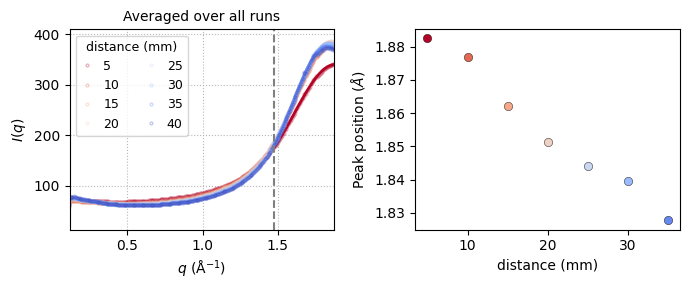

In [200]:
fig, (a1,a2) = plt.subplots(1,2,figsize=(7,3), tight_layout=True)
col = plt.cm.coolwarm_r(np.linspace(0,1,len(runs)))

Iqs = []
qs = []
xmin, xmax = 230, -1
for i in range(len(runs)):
    Iq_tmp = []
    for j in range(len(runs[i])):
        file = np.load(f'{path}water_{runs[i][j]}.npz')
        Iq_tmp.append(file['I'])
    qs.append(file['q'])
    Iqs.append(np.average(Iq_tmp, axis=0))
    a1.plot(qs[i], Iqs[i], c=col[i], ls='',marker='o', ms=2, alpha=.3, fillstyle='none', label=posz[i])
    if i != len(runs)-1:
        popt,xc,curve,perr = fit(gaussian, qs[i][xmin:xmax], Iqs[i][xmin:xmax], p0=[350,1.8,.3, 50])
        a1.plot(xc, curve, c=col[i], lw=2)
        a2.plot(posz[i], popt[1], c=col[i], marker='o', markeredgecolor='k', markeredgewidth=.3, ls='')
    
# for ref in [1.6129, 1.71, 1.82]:
#     plt.axvline(x=ref, ls='--', c='k', alpha=0.7, lw=1)
a1.axvline(x=qs[-1][xmin], ls='--', c='gray')

a1.set_xlim(file['q'][3], file['q'][-3])
a1.grid(ls=':',alpha=.9)
leg = a1.legend(handlelength=1, fontsize=9, ncol=2)
leg.set_title('distance (mm)',prop={'size':9})
# a1.setp(legend.get_title(),fontsize=8)
a1.set_ylabel(r'$I(q)$')
a1.set_xlabel(r'$q$ $\rm (\AA^{-1})$') 
a1.set_title('Averaged over all runs', fontsize=10)
a2.set_ylabel(r'Peak position ($\AA$)')
a2.set_xlabel('distance (mm)')